Classifier: Random Forest
Accuracy: 0.9808
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     21074
           1       1.00      0.79      0.88      2099

    accuracy                           0.98     23173
   macro avg       0.99      0.90      0.94     23173
weighted avg       0.98      0.98      0.98     23173



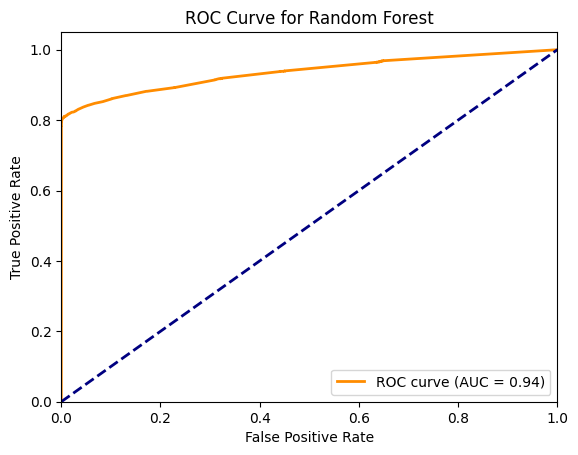

Classifier: Naive Bayes
Accuracy: 0.9556
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21074
           1       0.97      0.53      0.68      2099

    accuracy                           0.96     23173
   macro avg       0.96      0.76      0.83     23173
weighted avg       0.96      0.96      0.95     23173



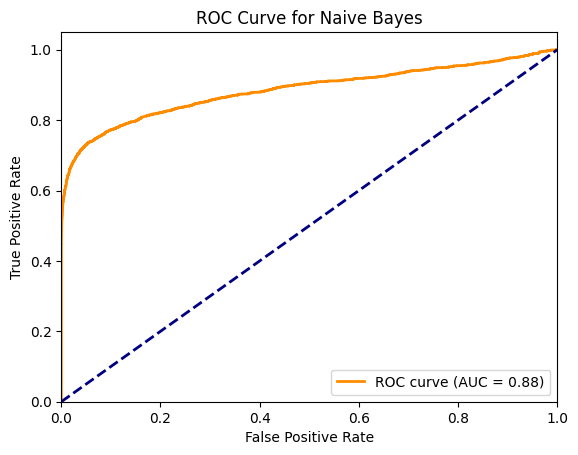

In [ ]:
import pandas as pd
import numpy as np
import re
import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/labeled_dataset1.csv')


# Split the data into training and testing sets
# Handle missing values
data['Preprocessed_Text'].fillna('', inplace=True)

# Split the data into training and testing sets
X = data['Preprocessed_Text'].values
y = data['New_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(probability=True),
    "Logistic Regression": LogisticRegression()
}

# Evaluate each classifier
for name, clf in classifiers.items():

  #training data
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    y_prob = clf.predict_proba(X_test_tfidf)[:, 1]

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)





    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()



